# EC Notebook for Lecture 20: Simulation Analysis

This extra credit Python notebook will let you practice the material you saw in lecture.  Completing all parts of this notebook will earn +1 extra credit point to your grade in STAT 107! :)

This notebook is worth +1 if turned in before 11:30 am on **Wednesday, Oct. 16** *(30 minutes before the next STAT 107 lecture)*.  You can feel free to complete it anytime for extra practice.

## Probability Analysis 

In the lecture, we simulate the results of our next exam. Now let's play a gambling game about flipping coins! The rule of the game is as follows:

1. Before the game, you need to pay \$30 to start the game. 
2. Game starts! You have 10 numbered coins to flip, every coin can be flipped only once.
3. Every time you finish flipping the coins, you will get some prize,
    1. If the 1st coin is head, you will get \$1.
    2. If the 2nd coin is head, you will get \$2.
    3. ....
    10. If the 10th coin is head, you will get \$10.
     
    


### Part 1: Simulation Function

Create a function to simulate the game and return the prize you get by flipping 10 coins.

In [5]:

def coin_game():
    import random 
    money = -30
    prize = 1
    for i in range(10):
        toss = random.randint(0,1)
        if toss == 1:
            money += prize
            prize += 1
        else:
            prize += 1
    
    return money



# Have a try!
coin_game()

3

The game sounds profitable! You feel excited and plan to play the game for 10,000 times. 

### Part 2: Game Begins!
Write a simulation to play the coin game for 10,000 times and store reward you get for each time in a DataFrame called `df`. **(Hint: reward = prize - payoff)**

In [10]:
import pandas as pd
data = []
for i in range(10000):
    coin = coin_game()
    d = {'reward':coin}
    data.append(d)

df = pd.DataFrame(data)


# Print out a few random rows:
print(df.sample(5))
# Let’s build some visualizations:
df.hist()#

      reward
3255      12
1818      -9
5902       6
3398       0
8957      -1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF51044748>]],
      dtype=object)

Is this game really profitable? Looking at the histogram you get, you begin to doubt and remember the cumulative average learned in the lecture may help.

### Part 3: Law of Large Numbers
Calculating your Cumulative Average Reward of the games and store it in a new column `average`.

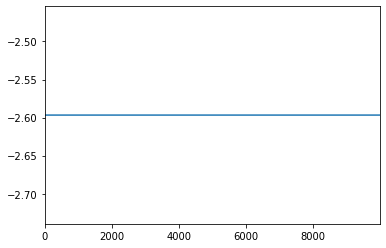

In [11]:
df['average'] = df['reward'].mean()



df['average'].plot()

In [12]:
## == TEST CASES for Part 1,2,3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(coin_game() <= 55 and coin_game() >= 0), "Make sure you play the right game"
assert(len(df) == 10000), "Make sure you played exactly 10,000 times"
assert(abs(df['reward'].sum()/10000 - df['average'][9999]) < 0.0001), "Make sure you stored correct average reward"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()


🎉 All tests passed! 🎉

